<h1><center><font size="25">Reconocimiento facial con deep learning y python</font></center></h1>

<center><b>Joaquin Amat Rodrigo</b></center>

<center><i>Mayo, 2021 (Updated January 2025)</i></center>

Más sobre ciencia de datos: [**cienciadedatos.net**](https://cienciadedatos.net)

## Introducción

Los modelos de *deep learning* se han convertido en los modelos de referencia dentro de muchos ámbitos, uno de ellos, la visión artificial o visión por computación. Un ejemplo de aplicación cada vez más extendido es el del reconocimiento facial, es decir, la identificación automatizada de las personas presentes en una imagen o vídeo.

De forma similar a como hacemos los humanos, para que un sistema informático sea capaz de identificar a las personas que aparecen en una imagen, son necesarias varias etapas:

1. Detectar las caras en la imagen.

2. Utilizar una red neuronal capaz de mapear las características de una cara humana en una representación numérica. Este paso se conoce como *embedding* o *encoding*.

3. Medir la similitud entre la representación numérica de las caras detectadas y las representaciones de referencia disponibles en una base de datos.

4. Determinar si son suficientemente similares para considerar que pertenecen a la misma persona y asignarle la identidad.


A lo largo de este documento, se describen e implementan cada uno de los pasos haciendo uso de las librerías disponibles en **python**. Finalmente, se combinan todos ellos para crear un programa capaz de identificar a las personas presentes en una imagen, vídeo o webcam.

<div align="center">
<img src="./images/diagrama_face_recognition.png" style="width: 900px;">
</div>

<center><font size='2.5'> <i>Diagrama de los pasos seguidos en un sistema de reconocimiento facial.</i></font></center>

## Librerías

### Código

In [1]:
# %load_ext autoreload
# %autoreload 2
# import sys
# from pathlib import Path
# path = str(Path.cwd().parent)
# print(path)
# sys.path.insert(1, path)


from deepfacerecognition import (
    FaceDetector,
    convert_to_matplotlib_rgb,
    ReferenceEmbeddings,
)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
imagen_1 = Image.open('../docs/images/imagen_1.jpg')
imagen_2 = Image.open('../docs/images/imagen_2.png')

In [3]:
face_detector = FaceDetector(
    detector = "MTCNN", #"OpenCV_Yunet",
    encoder = None,
    device = "cpu",
    min_face_size = 20,
    thresholds = [0.6, 0.7, 0.7],
    min_confidence_detector = 0.5,
    similarity_threshold = 0.5,
    similarity_metric = "cosine",
    keep_all = True,
    verbose = True
)
face_detector.device

'cpu'

In [4]:
boxes, probs = face_detector.detect_bboxes(
    image    = imagen_2,
    fix_bbox = True
)
boxes

----------------
Scanned image
----------------
Detected faces: 12
Detected faces with minimum confidence: 12
Bounding box correction applied: True
Bounding box coordinates: [[293, 64, 402, 194], [505, 89, 605, 224], [108, 95, 210, 227], [427, 207, 529, 333], [47, 235, 145, 361], [1069, 134, 1165, 262], [682, 126, 778, 248], [659, 291, 750, 402], [886, 128, 968, 250], [239, 245, 326, 355], [931, 496, 1012, 613], [816, 663, 889, 751]]
Bounding box confidence: [0.9999438524246216, 0.9982789754867554, 0.999267041683197, 0.9998809099197388, 0.9999357461929321, 0.9999068975448608, 0.9999818801879883, 0.9996474981307983, 0.9995021820068359, 0.9993504881858826, 0.9991905093193054, 0.9989155530929565]



array([[ 293,   64,  402,  194],
       [ 505,   89,  605,  224],
       [ 108,   95,  210,  227],
       [ 427,  207,  529,  333],
       [  47,  235,  145,  361],
       [1069,  134, 1165,  262],
       [ 682,  126,  778,  248],
       [ 659,  291,  750,  402],
       [ 886,  128,  968,  250],
       [ 239,  245,  326,  355],
       [ 931,  496, 1012,  613],
       [ 816,  663,  889,  751]])

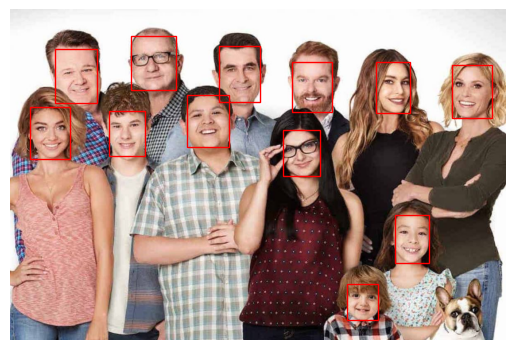

In [5]:
face_detector.display_bounding_boxes(
    image = imagen_2,
    bboxes = boxes,
)

----------------
Scanned image
----------------
Detected faces: 12
Detected faces with minimum confidence: 12
Bounding box correction applied: True
Bounding box coordinates: [[293, 64, 402, 194], [505, 89, 605, 224], [108, 95, 210, 227], [427, 207, 529, 333], [47, 235, 145, 361], [1069, 134, 1165, 262], [682, 126, 778, 248], [659, 291, 750, 402], [886, 128, 968, 250], [239, 245, 326, 355], [931, 496, 1012, 613], [816, 663, 889, 751]]
Bounding box confidence: [0.9999438524246216, 0.9982789754867554, 0.999267041683197, 0.9998809099197388, 0.9999357461929321, 0.9999068975448608, 0.9999818801879883, 0.9996474981307983, 0.9995021820068359, 0.9993504881858826, 0.9991905093193054, 0.9989155530929565]



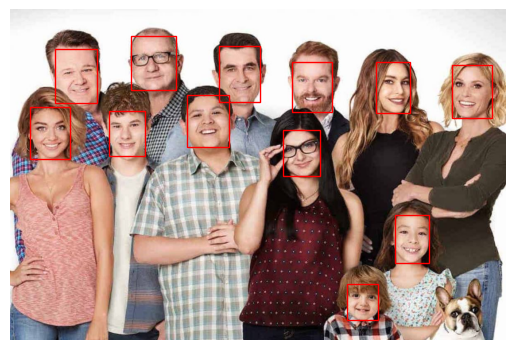

In [6]:
face_detector.detect_faces(
    image = imagen_2,
)

 faces.shape: torch.Size([12, 3, 160, 160])
tensor([[[ 0.9414,  0.9336,  0.9336,  ...,  0.9102,  0.9258,  0.9570],
         [ 0.9492,  0.9414,  0.9414,  ...,  0.9180,  0.9180,  0.9258],
         [ 0.9570,  0.9570,  0.9570,  ...,  0.9492,  0.9258,  0.9023],
         ...,
         [-0.2617, -0.2227, -0.1914,  ..., -0.2305, -0.2539, -0.2852],
         [-0.2539, -0.2148, -0.1914,  ..., -0.1914, -0.2148, -0.2539],
         [-0.2695, -0.2383, -0.2227,  ..., -0.1602, -0.1758, -0.1992]],

        [[ 0.9727,  0.9648,  0.9648,  ...,  0.9102,  0.9258,  0.9570],
         [ 0.9805,  0.9727,  0.9648,  ...,  0.9180,  0.9180,  0.9258],
         [ 0.9883,  0.9805,  0.9727,  ...,  0.9336,  0.9180,  0.9023],
         ...,
         [-0.4023, -0.3633, -0.3398,  ..., -0.5117, -0.5273, -0.5586],
         [-0.4023, -0.3633, -0.3477,  ..., -0.4961, -0.5273, -0.5664],
         [-0.4180, -0.3945, -0.3867,  ..., -0.4883, -0.5039, -0.5273]],

        [[ 0.9961,  0.9883,  0.9883,  ...,  0.8867,  0.9180,  0.9570],
 

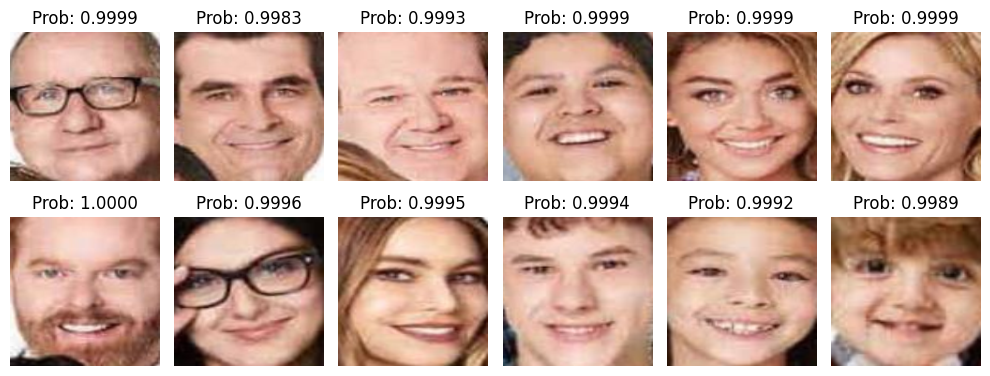

In [7]:
faces, probs = face_detector.extract_faces(
    image = imagen_2
)
print(f" faces.shape: {faces.shape}")

fig, axs = plt.subplots(nrows=2, ncols=int(np.ceil(len(faces)/2)), figsize=(10, 4))
axs = axs.flatten()
for i in range(faces.shape[0]):
    face = convert_to_matplotlib_rgb(faces[i])
    # add a title with the probability
    axs[i].set_title(f'Prob: {probs[i]:.4f}')
    axs[i].imshow(face)
    axs[i].axis('off')
fig.tight_layout()

print(faces[0])

In [8]:
embeddings = face_detector.calculate_embeddings(face_images=faces)
embeddings

tensor([[ 7.3119e-02,  1.3807e-02, -2.0866e-02,  ..., -5.1862e-02,
          5.5240e-02,  4.7610e-03],
        [-6.3946e-02, -1.7960e-02, -3.9687e-02,  ...,  6.9325e-02,
         -9.6542e-02, -9.4992e-02],
        [ 3.1438e-02,  6.8282e-02, -6.3409e-03,  ..., -9.6854e-05,
          3.9739e-02, -1.2795e-02],
        ...,
        [ 4.7704e-02, -1.6753e-02,  3.7802e-02,  ..., -2.9759e-02,
         -3.5267e-02, -1.2076e-02],
        [ 4.3862e-02, -7.2438e-03,  2.1455e-02,  ..., -1.0147e-02,
          1.3584e-02,  4.7367e-03],
        [-4.3593e-03, -2.1744e-02,  3.1877e-02,  ..., -6.5899e-02,
          2.2239e-02,  1.8709e-02]])

In [9]:
# Create reference embeddings from a folder of images
# ==============================================================================
reference_embeddings = ReferenceEmbeddings(
    folder_path='../docs/images/reference_images'
)

reference_embeddings.calculate_reference_embeddings()
reference_embeddings

Processing identity: JayPritchett
  Reading image: ../docs/images/reference_images/JayPritchett/descarga (2).jpg
  Reading image: ../docs/images/reference_images/JayPritchett/JayPritchett.png
Processing identity: AlexDunphy
  Reading image: ../docs/images/reference_images/AlexDunphy/5e8f3e2373d0c84a052dc5e2.jpg
  Reading image: ../docs/images/reference_images/AlexDunphy/alex-black-floral-ruffle-blouse.jpg
  Reading image: ../docs/images/reference_images/AlexDunphy/AlexDunphy.png
Processing identity: CameronTucker
  Reading image: ../docs/images/reference_images/CameronTucker/descarga.jpg
  Reading image: ../docs/images/reference_images/CameronTucker/CameronTucker.png
Processing identity: JoePritchett
  Reading image: ../docs/images/reference_images/JoePritchett/images (1).jpg
  Reading image: ../docs/images/reference_images/JoePritchett/images.jpg
  Reading image: ../docs/images/reference_images/JoePritchett/Joe_Pritchett.jpg
  Reading image: ../docs/images/reference_images/JoePritchet

---------------
ReferenceEmbeddings Object
---------------
Number of identities: 13
Number of images per identity: {'JayPritchett': 2, 'AlexDunphy': 3, 'CameronTucker': 2, 'JoePritchett': 5, 'MitchellPritchett': 3, 'HaleyDunphy': 4, 'PhilDunphy': 4, 'JoaquinAmat': 1, 'MannyDelgado': 6, 'LilyTucker-Pritchett': 4, 'ClaireDunphy': 3, 'GloriaPritchett': 3, 'LukeDunphy': 4}
Source folder: ../docs/images/reference_images
Save path: None
Device: None
Minimum face size: 20
Detection thresholds: [0.6, 0.7, 0.7]
Minimum confidence for detection: 0.5
Verbose: True

In [10]:
# Load reference embeddings into the face detector
# ==============================================================================
face_detector.load_reference_embeddings(reference_embeddings)

In [11]:
identities, similarities = face_detector.identify_faces(
    embeddings=embeddings
)
print(f"Identidades: {identities}")
print(f"Similitudes: {similarities}")

----------------
Identified faces
----------------
Face 0: Identity: JayPritchett, Similarity: 0.69
Face 1: Identity: PhilDunphy, Similarity: 0.92
Face 2: Identity: CameronTucker, Similarity: 0.80
Face 3: Identity: MannyDelgado, Similarity: 0.87
Face 4: Identity: HaleyDunphy, Similarity: 0.75
Face 5: Identity: ClaireDunphy, Similarity: 0.78
Face 6: Identity: MitchellPritchett, Similarity: 0.61
Face 7: Identity: AlexDunphy, Similarity: 0.62
Face 8: Identity: GloriaPritchett, Similarity: 0.68
Face 9: Identity: LukeDunphy, Similarity: 0.79
Face 10: Identity: LilyTucker-Pritchett, Similarity: 0.80
Face 11: Identity: JoePritchett, Similarity: 0.77
Identidades: ['JayPritchett', 'PhilDunphy', 'CameronTucker', 'MannyDelgado', 'HaleyDunphy', 'ClaireDunphy', 'MitchellPritchett', 'AlexDunphy', 'GloriaPritchett', 'LukeDunphy', 'LilyTucker-Pritchett', 'JoePritchett']
Similitudes: [0.6871325969696045, 0.9191560745239258, 0.7987002730369568, 0.874779462814331, 0.746529757976532, 0.7806506752967834, 0

----------------
Scanned image
----------------
Detected faces: 12
Detected faces with minimum confidence: 12
Bounding box correction applied: True
Bounding box coordinates: [[293, 64, 402, 194], [505, 89, 605, 224], [108, 95, 210, 227], [427, 207, 529, 333], [47, 235, 145, 361], [1069, 134, 1165, 262], [682, 126, 778, 248], [659, 291, 750, 402], [886, 128, 968, 250], [239, 245, 326, 355], [931, 496, 1012, 613], [816, 663, 889, 751]]
Bounding box confidence: [0.9999438524246216, 0.9982789754867554, 0.999267041683197, 0.9998809099197388, 0.9999357461929321, 0.9999068975448608, 0.9999818801879883, 0.9996474981307983, 0.9995021820068359, 0.9993504881858826, 0.9991905093193054, 0.9989155530929565]

----------------
Identified faces
----------------
Face 0: Identity: JayPritchett, Similarity: 0.68
Face 1: Identity: PhilDunphy, Similarity: 0.92
Face 2: Identity: CameronTucker, Similarity: 0.80
Face 3: Identity: MannyDelgado, Similarity: 0.88
Face 4: Identity: HaleyDunphy, Similarity: 0.74
Fa

KeyboardInterrupt: 

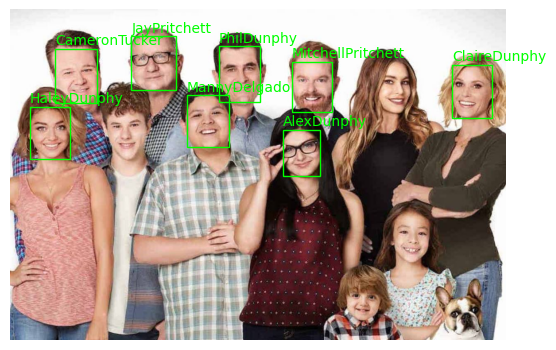

In [12]:
face_detector.detect_and_identify_faces(
    image=imagen_2,
)

In [ ]:
# face_detector.detect_and_identify_faces_video(
#     video_path='./videos/video_modern_family.mp4',
#     output_path='./videos/output_test.mp4'
# )

In [ ]:
face_detector.detect_and_identify_faces_webcam(capture_index=0, skip_frames=2, show=True)

KeyboardInterrupt: 